# Explore the imaging data set
J. C. Runnoe, 2021

This Jupyter notebook includes tasks and code snippets to help you interact with the Imaging/ data set that we will reduce in this course. The cells below are not exhaustive, so expect to add cells, modify code, and add new code to complete the tasks. For additional help, see these notebooks:

<a href="https://github.com/mwcraig/ccd-reduction-and-photometry-guide/blob/master/notebooks/00-00-Preface.ipynb">00-00 Preface</a> <br>
<a href="https://github.com/mwcraig/ccd-reduction-and-photometry-guide/blob/master/notebooks/01-00-Understanding-an-astronomical-CCD-image.ipynb">01-00 Understanding-an-astronomical-CCD-image</a> <br>
<a href="https://github.com/mwcraig/ccd-reduction-and-photometry-guide/blob/master/notebooks/01-03-Construction-of-an-artificial-but-realistic-image.ipynb">01-03 Construction-of-an-artificial-but-realistic-image</a>


## 1. Set up your work space

<b>Your git practice directory</b><br>
You should make a working directory in our Git repository for weekly practice coding. I give one example below, but you can organize your personal directory however you choose, so using a "practice" directory isn't required. Start by navigating to your space in the class repository: <br>

Jess@Shasta:repos> cd ASTR8060/ <br>
Jess@Shasta:ASTR8060> ls <br>
LICENSE		README.md	work <br>
Jess@Shasta:ASTR8060> cd work/runnoejc/ <br>
Jess@Shasta:runnoejc> mkdir practice <br>

Use a .gitkeep file to add this directory to the Git staging area and commit it.

Jess@Shasta:runnoejc> mkdir practice <br>
Jess@Shasta:runnoejc> cd practice <br>
Jess@Shasta:practice> touch .gitkeep <br>
Jess@Shasta:practice> git add .gitkeep <br>
Jess@Shasta:practice> git commit -m "Added practice dir with .gitkeep." <br>

Then, either start a Juypter notebook with an informative name, or copy this one over, to begin working with the imaging data set.

Jess@Shasta:practice> cp ../../runnoejc/explore-data.ipynb ./explore-data-studentname.ipynb <br>
Jess@Shasta:practice> git add explore-data-studentname.ipynb <br>
Jess@Shasta:practice> git commit -m "Added runnoe explore-data notebook." <br>

<b>Your data directory</b><br>
The Imaging/ directory that you downloaded from Brighspace is too large for a Git repository, so you should keep it elsewhere on your computer. It is good practice (because you will inevitably change your mind about something, or make a mistake) to keep this copy prestine without modifying the file. Thus, you should create another directory for your data reductions.

One possible directory structure is as follows:

<img src="./img/dir_tree.png" alt="Directory Tree Image" width="300" align="left"/> 
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
Make sure you have the Imaging/ data set and make a reduced directory on your local machine.

## 2. Initialize Python

In [1]:
# import block
import numpy as np
from astropy.io import fits
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.visualization import hist

In [3]:
# since you can't store your data in our Git repo,define some directories for easy access
# your directories will be different than mine, so make sure these point to the right place
data_dir = '/home/kyle/Homework/Astro8060/NoBackupImages/raw/'
reduced_dir = '/home/kyle/Homework/Astro8060/NoBackupImages/reduced/'

## 3. Look at the data in DS9
In DS9, open and display a bias, flat, dark frame. Play with scaling and cursor options. 

<b>The observing log</b><br>
In order to figure out the filenames associated with different types of files, use a text editor (e.g., nano, vim, emacs, or other) to open the Imaging/log.txt file. This is the observing log for this data set and includes everything you need to know about the data. It will be handy to keep this open while you work.

<b>Opening files with DS9</b><br>
You can do this from the command line with:
Jess@Shasta:Imaging> ds9 a102.fits & <br>

Here, the \& at the end will free up your terminal while DS9 is open.

Note that on my Mac, I have the command ds9 aliased as follows:<br>
Jess@Shasta:practice> which ds9 <br>
ds9: 	 aliased to open /Volumes/Shasta/Applications/SAOImageDS9.app/Contents/MacOS/ds9

You can also open DS9 independently, and then select File>Open in the GUI and navigate to the file you want. Frame>New will allow you to open more than one file at a time.

<b>Things to try</b><br>
Play with scaling and cursor options. Make sure you can use your cursor to identify column and row numbers and pixel values.

## 4. Now open and display the same images in Python

This is useful because it means you do not have to save an image to a fits file to inspect it. Since we will be doing all of the data reduction in Python, you will want this functionality.

Below, I give an example for one bias frame. Expand the code to make plots for a bias, flat, and dark frame.

In [4]:
# first, open the data
img_file = data_dir+'a093.fits' # a bias frame
img_hdu  = fits.open(img_file)
img      = img_hdu[0].data
hdr      = img_hdu[0].header

In [5]:
# explore the header
hdr

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 2200 / Axis length                                    
NAXIS2  =                 2048 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2009-09-15T15:56:40' / Date FITS file was generated                  
IRAF-TLM= '09:56:39 (15/09/2009)' / Time of last modification                   
DATAMIN =           5.720000E2 / Minimum data value                             
DATAMAX =           7.536000

In [6]:
# or select a specific column from the header
hdr['DATE-OBS']

'2009-06-23T04:19:45.000'

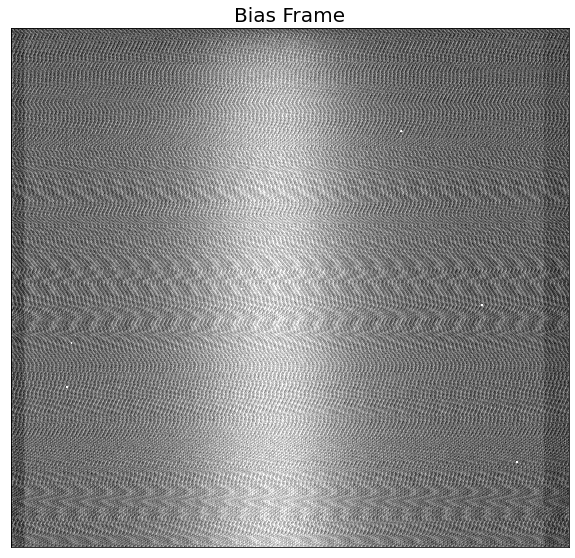

In [9]:
# plot with pyplot
min_level = np.mean(img)-1.*np.std(img)
max_level = np.mean(img)+1.*np.std(img)

fig = plt.subplots(1,1,figsize=(10,10)) 
plt.imshow(img, vmin=min_level, vmax=max_level,cmap='gray') 
plt.xticks([]) 
plt.yticks([]) 
plt.title('Bias Frame',size=20) 
plt.grid(False) 
plt.show()

Another method that I like for plotting is to use the show_image() convenience function from the photometry tutorial here: https://github.com/mwcraig/ccd-reduction-and-photometry-guide.

Because this is a Github repository, you can clone it so that you have a copy on your local machine. If I am in a repos/ directory above my astr_8060_f21/ class repository, it would be logical to add another one there. Use git to clone as follows: <br>

Jess@Shasta:repos> mkdir phot_tutorial <br>
Jess@Shasta:repos> cd phot_tutorial <br>
Jess@Shasta:phot_tutorial> git clone https://github.com/mwcraig/ccd-reduction-and-photometry-guide .

Then use the trick below to import the show_image() convenience function.

In [11]:
phot_tutorial_dir = '/home/kyle/Homework/Astro8060/ccd-reduction-and-photometry-guide/notebooks/'
import sys
sys.path.insert(0,phot_tutorial_dir)
from convenience_functions import show_image

Text(0.5, 1.0, 'Bias Frame')

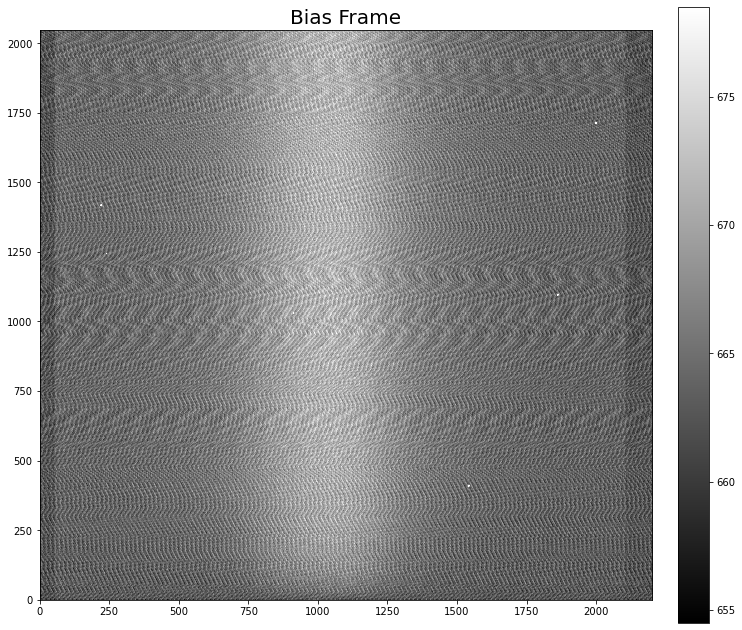

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
show_image(img, cmap='gray', ax=ax, fig=fig)
ax.set_title('Bias Frame',size=20)

## 5. Select individual rows and columns from an image and plot them

Because of the bias, the raw images are not square. Use DS9 to figure out whether there are extra columns or rows, and then inspect the dimensionality of the data to determine what index corresponds to a row versus a column.

Can you see the bright vertical stripe in the bias in your line plot? Also plot some lines and columns from a flat frame.

In [28]:
print(img.shape) #[row,collumn]
pixel = np.arange(img.shape[1])
value = img[100,pixel]

#Folding, if its a stripe, should show up prominent
folded = img[0,pixel]
for i in range(1,img.shape[0]):
    folded += img[i,pixel]

(2048, 2200)


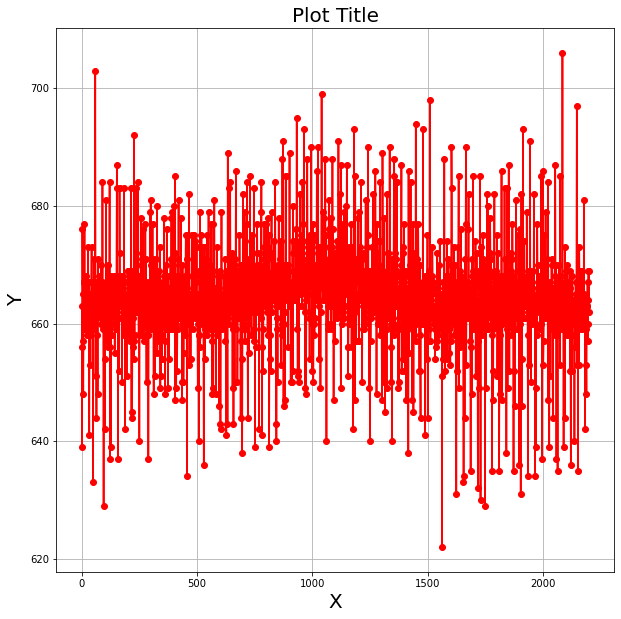

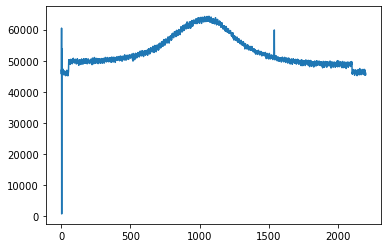

In [30]:
# code snippet for a nice plot
plt.figure(figsize=(10,10))
plt.plot(pixel,value,'red')
plt.plot(pixel,value,'red',marker='o')
plt.grid()
plt.xlabel('X',size=20)
plt.ylabel('Y',size=20)
plt.title('Plot Title',size=20)
plt.show()

#Show folded plot
plt.plot(pixel,folded)
plt.show()

## 6. Make a histogram of image values for a bias, flat, and dark

This will show you the distribution of values that the pixels have. If you take a mean, or standard deviation, or other statistical measure of the image, you are probing this distribution. 

By combining images of the same type (e.g., flats) with noise and artefacts, you will reduce the standard deviation. Measuring this value is a useful way to identify an image combination recipe that works well for your data, but visualizing it can be helpful too.

Mean of the frame is 665.8 and RMS is 9.5.


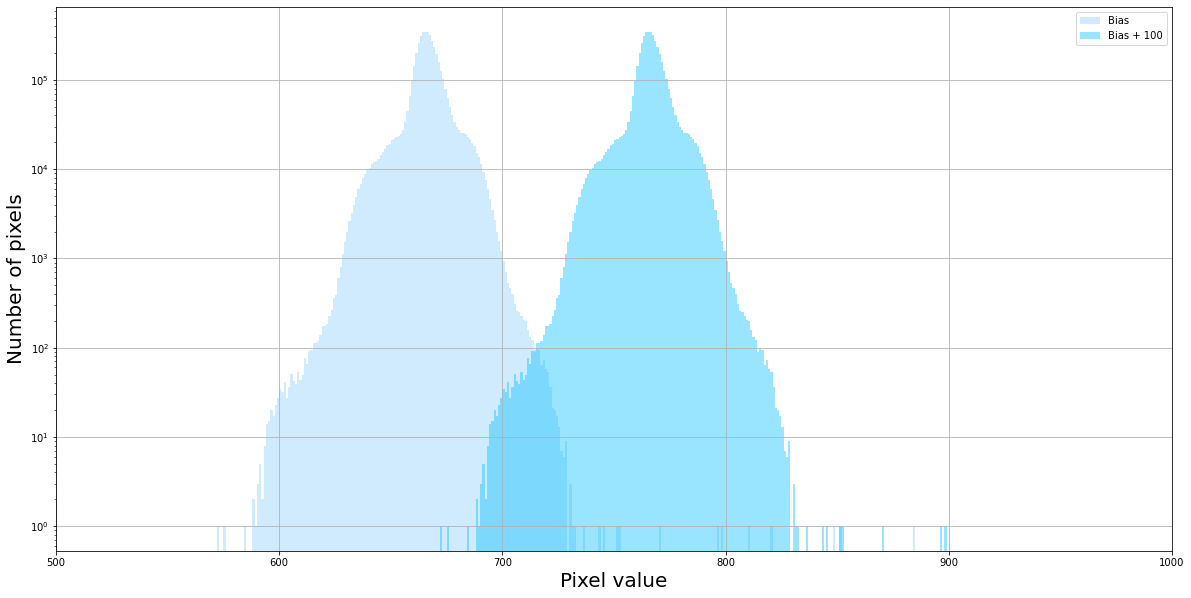

In [31]:
# print statistics about the image
print('Mean of the frame is {0:4.1f} and RMS is {1:3.1f}.'.format(np.mean(img.data),np.std(img.data)))

# make a plot of values in the image
# this includes a code snippet to overplot a second histogram from another image
# (although here the other image is just the same image again but shifted)
bins = np.histogram_bin_edges(img, bins=400, range=[500,900])
#bins_md = np.histogram_bin_edges(bias_med, bins=100, range=[600,700])

plt.figure(figsize=(20, 10))
hist(img.flatten(), bins=bins, alpha=0.4, label='Bias', color='lightskyblue')
hist(img.flatten()+100, bins=bins, alpha=0.4, label='Bias + 100',color='deepskyblue')
plt.grid()
plt.legend()
plt.xlim([500,1000])
plt.xlabel('Pixel value',size=20)
plt.ylabel('Number of pixels',size=20)
plt.semilogy();

## 7. Combine images
Choose at least 3 biases and mean and median combine them to create two master biases. Evaluate (with difference imaging and by plotting the distribution of their values on the same histogram) which is preferred.

In [37]:
# this is dummy code to define bias1-3
# replace with your code to read in images
def readImage(frameNumber):
    img_file = data_dir+'a{}.fits'.format(frameNumber)
    img_hdu  = fits.open(img_file)
    return img_hdu[0].data


bias1 = readImage('094')
bias2 = readImage('095')
bias3 = readImage('096')

In [38]:
# combine some images
# this stacks the frames, with shape (3,2048,2200)
# so axis=0 takes the mean of each pixel in the image
bias_mean = np.mean([bias1,bias2,bias3],axis=0)
bias_med  = np.median([bias1,bias2,bias3],axis=0)

Text(0.5, 1.0, 'Difference')

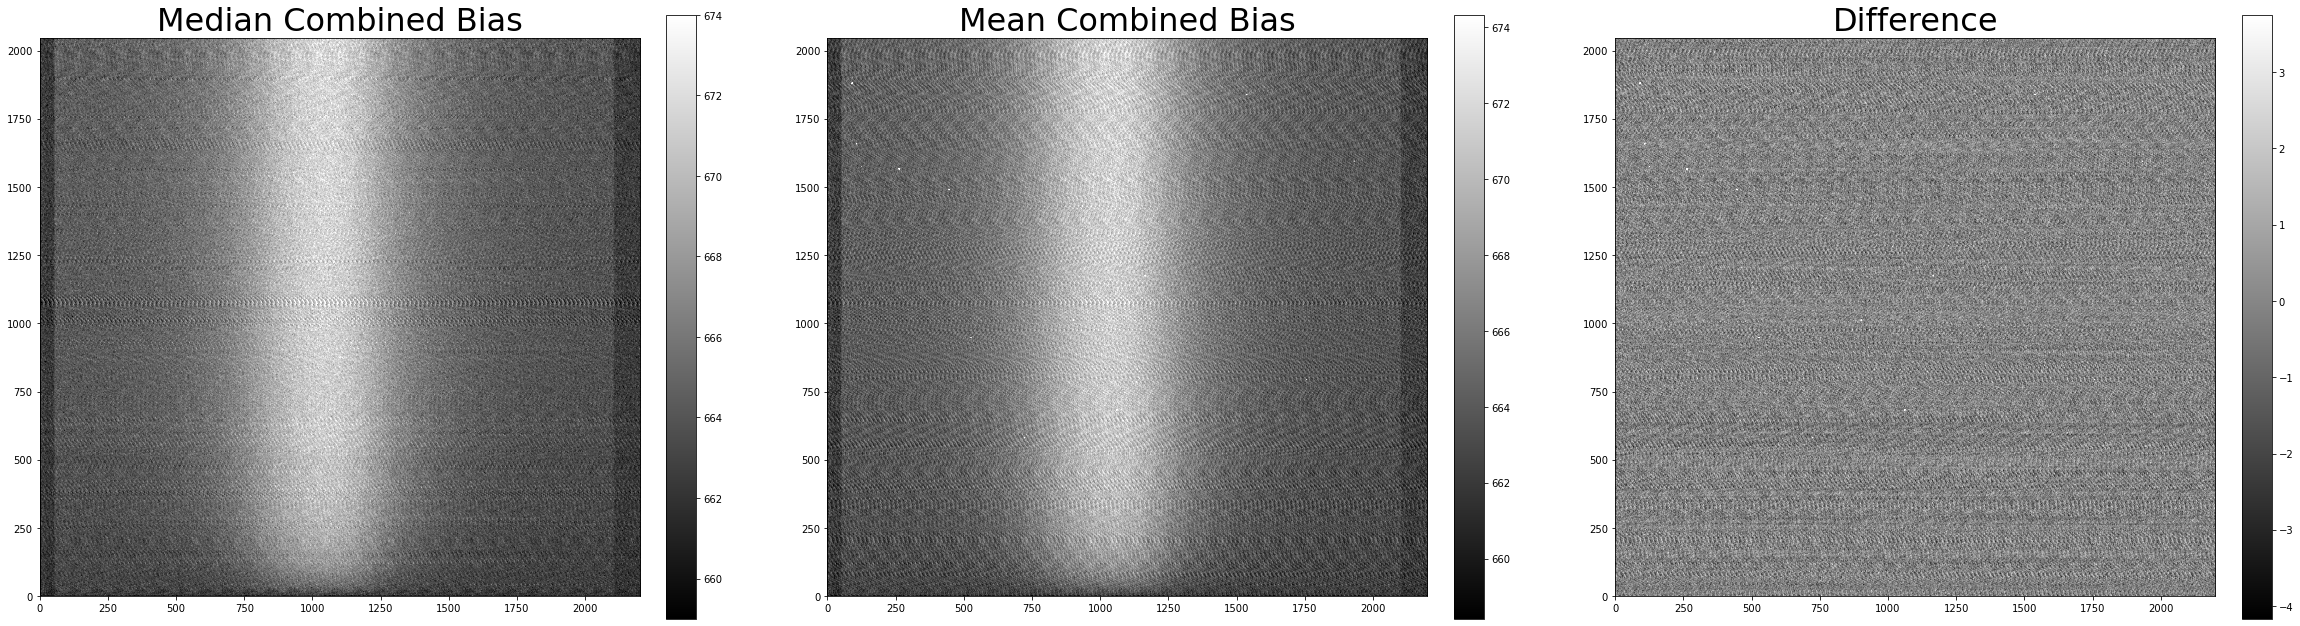

In [39]:
# you can make rows of plots for easy comparison
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(40, 12))
show_image(bias_med, cmap='gray', ax=ax1, fig=fig)
ax1.set_title('Median Combined Bias',size=32)
show_image(bias_mean, cmap='gray', ax=ax2, fig=fig)
ax2.set_title('Mean Combined Bias',size=32)
show_image(bias_mean-bias_med, cmap='gray', ax=ax3, fig=fig)
ax3.set_title('Difference',size=32)

## Summary

After finishing this notebook, you should have:

 - Set up your workspace.
 - Practiced inspecting fits images with DS9.
 - Learned to read in fits images with Python in a Jupyter notebook.
 - Learned to plot fits images with Python.
 - Learned to select regions, columns, and rows of an image.
 - Plotted the distribution of pixel values in an image.
 - Compared methods for combining images.
